In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('../datasets/input.csv')
target = pd.read_csv('../datasets/target.csv')

In [4]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='outer')
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        1261 non-null   int64  
 1   인당_GDP    1261 non-null   float64
 2   부채비율      1261 non-null   float64
 3   실업률       1261 non-null   float64
 4   상품및서비스수입  1261 non-null   float64
 5   상품및서비스수출  1261 non-null   float64
 6   정치적안정성    1261 non-null   int64  
 7   규제의질      1261 non-null   int64  
 8   경상수지      1261 non-null   float64
 9   신용등급점수    1261 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 98.6 KB


In [5]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_GDP,부채비율,실업률,상품및서비스수입,상품및서비스수출,정치적안정성,규제의질,경상수지,신용등급점수
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,7.505155,22012.779330,55.695265,7.113140,4.170044,3.660556,54.612213,67.015860,-1.326674,12.526324
std,4.603761,22939.181148,37.783440,4.499929,10.071854,9.109875,27.897707,23.512842,7.070186,5.288810
min,0.000000,333.731576,-3.400000,0.210000,-50.275895,-56.736571,0.000000,6.000000,-41.526871,0.000000
25%,4.000000,4379.658787,30.300000,4.120000,0.200224,0.259701,29.000000,48.000000,-4.754963,8.000000
50%,8.000000,12808.038340,47.100000,6.120000,4.560764,4.075288,58.000000,70.000000,-1.742977,12.500000
75%,11.000000,36323.447740,70.780000,8.480000,9.093538,7.668103,79.000000,88.000000,2.367691,17.000000
max,15.000000,123514.196700,266.200000,31.110000,66.893243,86.043298,100.000000,100.000000,27.397650,20.000000


In [6]:
# datasets.iloc[:,9] = (round(datasets.iloc[:,9])).astype(int)
# datasets['신용등급점수'] = datasets['신용등급점수'].apply(lambda x: 4 if x<4 else x)

In [7]:
datasets.iloc[:,9] = (round(datasets.iloc[:,9])).astype(int).astype(str)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:9], datasets.iloc[:,9], test_size=0.2, random_state=42)

In [9]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
acc = accuracy_score(pred, y_test)
print(f'acc : {acc}')

acc : 0.4150197628458498


<AxesSubplot:>

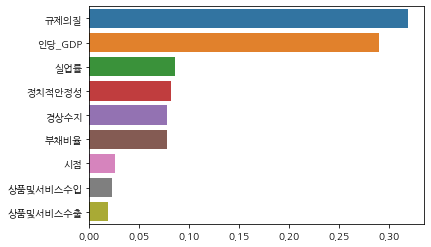

In [10]:
fi = pd.Series(rf.feature_importances_, rf.feature_names_in_)
fi = fi.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=fi.values, y=fi.index)

In [11]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_train_ss = pd.DataFrame(x_train_ss, columns=x_train.columns)
x_test_ss = ss.fit_transform(x_test)
x_test_ss = pd.DataFrame(x_test_ss, columns=x_test.columns)

rf1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf1.fit(x_train_ss, y_train)
pred = rf1.predict(x_test_ss)
acc = accuracy_score(pred, y_test)
print(f'acc : {acc}')

acc : 0.42292490118577075


<AxesSubplot:>

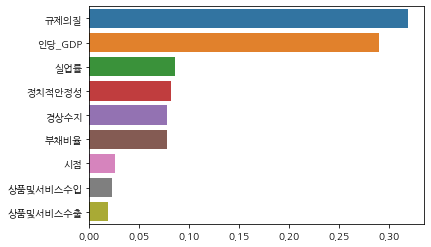

In [12]:
fi1 = pd.Series(rf1.feature_importances_, x_train_ss.columns)
fi1 = fi1.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=fi.values, y=fi.index)